# Основные функции NLTK

## Импорт библиотек

In [ ]:
!pip install wordcloud
!pip install pymorphy2
!pip3 install bs4
import pymorphy2
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
nltk.download('punkt')
nltk.download('stopwords')

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=5a55c5c3a9bbcb864310024fde1b634c7e41dd420709c6d6cf8bb680174cf0f1
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
text ='''
      У лукоморья дуб зелёный;
      Златая цепь на дубе том.
      И днём и ночью кот учёный
      Всё ходит по цепи кругом.
      Идёт направо — песнь заводит,
      Налево — сказку говорит.
      Там чудеса: там леший бродит,
      Русалка на ветвях сидит.
      Там на неведомых дорожках
      Следы невиданных зверей.
      Избушка там на курьих ножках
      Стоит без окон, без дверей.
      Там лес и дол видений полны.
      Там о заре прихлынут волны
      На брег песчаный и пустой,
      И тридцать витязей прекрасных
      Чредой из вод выходят ясных,
      И с ними дядька их морской.
      Там королевич мимоходом
      Пленяет грозного царя.
      Там в облаках перед народом
      Через леса, через моря
      Колдун несёт богатыря.
      В темнице там царевна тужит,
      А бурый волк ей верно служит.
      Там ступа с Бабою Ягой
      Идёт, бредёт сама собой,
      Там царь Кащей над златом чахнет;
      Там русский дух… там Русью пахнет!
      И там я был, и мёд я пил;
      У моря видел дуб зелёный;
      Под ним сидел, и кот учёный
      Свои мне сказки говорил.
          '''

## Разбиваем текст на предложения

In [ ]:
sentences = sent_tokenize(text, language='russian')

print(20 * "-")
print(sentences)
print(20 * "-")
print("Всего предложений: ", len(sentences))

--------------------
['\n      У лукоморья дуб зелёный;\n      Златая цепь на дубе том.', 'И днём и ночью кот учёный\n      Всё ходит по цепи кругом.', 'Идёт направо — песнь заводит,\n      Налево — сказку говорит.', 'Там чудеса: там леший бродит,\n      Русалка на ветвях сидит.', 'Там на неведомых дорожках\n      Следы невиданных зверей.', 'Избушка там на курьих ножках\n      Стоит без окон, без дверей.', 'Там лес и дол видений полны.', 'Там о заре прихлынут волны\n      На брег песчаный и пустой,\n      И тридцать витязей прекрасных\n      Чредой из вод выходят ясных,\n      И с ними дядька их морской.', 'Там королевич мимоходом\n      Пленяет грозного царя.', 'Там в облаках перед народом\n      Через леса, через моря\n      Колдун несёт богатыря.', 'В темнице там царевна тужит,\n      А бурый волк ей верно служит.', 'Там ступа с Бабою Ягой\n      Идёт, бредёт сама собой,\n      Там царь Кащей над златом чахнет;\n      Там русский дух… там Русью пахнет!', 'И там я был, и мёд я пил;\n

## Удаляем стоп-слова

In [ ]:
stop_words = set(stopwords.words('russian'))

print(10 * "-", " Стоп-слова ", 10 * "-")
print(stop_words)
print(20 * "-")

----------  Стоп-слова  ----------
{'по', 'больше', 'них', 'этой', 'но', 'теперь', 'она', 'сам', 'такой', 'никогда', 'не', 'свою', 'всего', 'от', 'конечно', 'того', 'какой', 'этом', 'а', 'иногда', 'и', 'к', 'раз', 'ней', 'то', 'мы', 'чего', 'кто', 'он', 'мой', 'уж', 'ли', 'чем', 'только', 'разве', 'ни', 'после', 'между', 'много', 'тем', 'об', 'наконец', 'нас', 'нет', 'если', 'вдруг', 'в', 'за', 'надо', 'опять', 'впрочем', 'этого', 'ну', 'один', 'куда', 'у', 'при', 'даже', 'ему', 'всех', 'тоже', 'тебя', 'чуть', 'так', 'мне', 'же', 'два', 'здесь', 'им', 'перед', 'ничего', 'как', 'ж', 'зачем', 'лучше', 'еще', 'когда', 'я', 'там', 'ей', 'можно', 'до', 'какая', 'вас', 'этот', 'тот', 'эту', 'хорошо', 'над', 'о', 'будет', 'или', 'три', 'все', 'всегда', 'меня', 'была', 'вот', 'был', 'вам', 'во', 'без', 'почти', 'другой', 'для', 'себе', 'ее', 'потом', 'том', 'совсем', 'тогда', 'нельзя', 'себя', 'что', 'под', 'через', 'быть', 'тут', 'они', 'их', 'со', 'всю', 'на', 'хоть', 'его', 'из', 'про', 'се

--------------------
['У', 'лукоморья', 'дуб', 'зелёный', ';', 'Златая', 'цепь', 'на', 'дубе', 'том', '.', 'И', 'днём', 'и', 'ночью', 'кот', 'учёный', 'Всё', 'ходит', 'по', 'цепи', 'кругом', '.', 'Идёт', 'направо', '—', 'песнь', 'заводит', ',', 'Налево', '—', 'сказку', 'говорит', '.', 'Там', 'чудеса', ':', 'там', 'леший', 'бродит', ',', 'Русалка', 'на', 'ветвях', 'сидит', '.', 'Там', 'на', 'неведомых', 'дорожках', 'Следы', 'невиданных', 'зверей', '.', 'Избушка', 'там', 'на', 'курьих', 'ножках', 'Стоит', 'без', 'окон', ',', 'без', 'дверей', '.', 'Там', 'лес', 'и', 'дол', 'видений', 'полны', '.', 'Там', 'о', 'заре', 'прихлынут', 'волны', 'На', 'брег', 'песчаный', 'и', 'пустой', ',', 'И', 'тридцать', 'витязей', 'прекрасных', 'Чредой', 'из', 'вод', 'выходят', 'ясных', ',', 'И', 'с', 'ними', 'дядька', 'их', 'морской', '.', 'Там', 'королевич', 'мимоходом', 'Пленяет', 'грозного', 'царя', '.', 'Там', 'в', 'облаках', 'перед', 'народом', 'Через', 'леса', ',', 'через', 'моря', 'Колдун', 'несёт', 

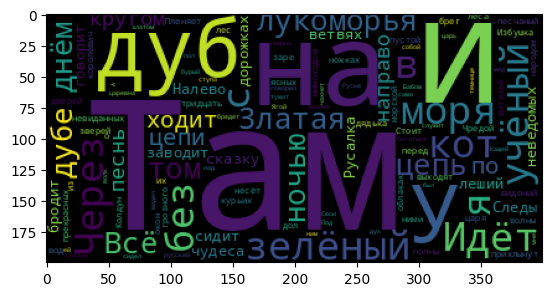

In [ ]:
words = word_tokenize(text)

print( 20 * "-")
print(words)
print(20 * "-")
print("Всего слов в вашем тексте: ", len(words))
print(20 * "-")

wc = WordCloud().generate(' '.join([i for i in words]))
plt.imshow(wc)

----------  Слова в нижнем регистре без стоп-слов  ----------
['лукоморья', 'дуб', 'зелёный', 'златая', 'цепь', 'дубе', 'днём', 'ночью', 'кот', 'учёный', 'всё', 'ходит', 'цепи', 'кругом', 'идёт', 'направо', 'песнь', 'заводит', 'налево', 'сказку', 'говорит', 'чудеса', 'леший', 'бродит', 'русалка', 'ветвях', 'сидит', 'неведомых', 'дорожках', 'следы', 'невиданных', 'зверей', 'избушка', 'курьих', 'ножках', 'стоит', 'окон', 'дверей', 'лес', 'дол', 'видений', 'полны', 'заре', 'прихлынут', 'волны', 'брег', 'песчаный', 'пустой', 'тридцать', 'витязей', 'прекрасных', 'чредой', 'вод', 'выходят', 'ясных', 'ними', 'дядька', 'морской', 'королевич', 'мимоходом', 'пленяет', 'грозного', 'царя', 'облаках', 'народом', 'леса', 'моря', 'колдун', 'несёт', 'богатыря', 'темнице', 'царевна', 'тужит', 'бурый', 'волк', 'верно', 'служит', 'ступа', 'бабою', 'ягой', 'идёт', 'бредёт', 'сама', 'собой', 'царь', 'кащей', 'златом', 'чахнет', 'русский', 'русью', 'пахнет', 'мёд', 'пил', 'моря', 'видел', 'дуб', 'зелёный', 

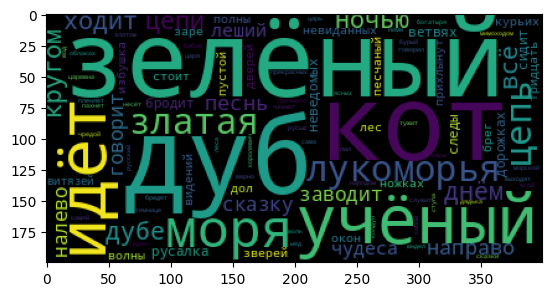

In [ ]:
words = [word.lower() for word in words if word.isalpha()]
words = [word for word in words if word not in stop_words]

print(10 * "-", " Слова в нижнем регистре без стоп-слов ", 10 * "-")
print(words)
print(20 * "-")
print("Всего слов в вашем тексте: ", len(words))
print(20 * "-")

wc = WordCloud().generate(' '.join([i for i in words]))
plt.imshow(wc)

## Лемматизация

----------  Слова в начальной форме  ----------
['лукоморье', 'дуб', 'зелёный', 'златой', 'цепь', 'дуб', 'день', 'ночью', 'кот', 'учёный', 'всё', 'ходить', 'цепь', 'кругом', 'идти', 'направо', 'песня', 'заводить', 'налево', 'сказка', 'говорить', 'чудо', 'леший', 'бродить', 'русалка', 'ветвь', 'сидеть', 'неведомый', 'дорожка', 'след', 'невиданный', 'зверь', 'избушка', 'курий', 'ножка', 'стоить', 'окно', 'дверь', 'лес', 'дол', 'видение', 'полный', 'заря', 'прихлынуть', 'волна', 'брег', 'песчаный', 'пустой', 'тридцать', 'витязь', 'прекрасный', 'чреда', 'вода', 'выходить', 'ясный', 'они', 'дядька', 'морской', 'королевич', 'мимоходом', 'пленять', 'грозный', 'царь', 'облако', 'народ', 'лес', 'море', 'колдун', 'нести', 'богатырь', 'темница', 'царевна', 'тужить', 'бурый', 'волк', 'верно', 'служить', 'ступа', 'баба', 'яга', 'идти', 'брести', 'сам', 'себя', 'царь', 'кащи', 'злато', 'чахнуть', 'русский', 'русь', 'пахнуть', 'мёд', 'пить', 'море', 'видеть', 'дуб', 'зелёный', 'сидеть', 'кот', 'учёны

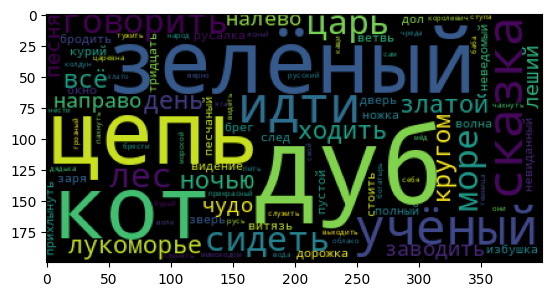

In [ ]:
morph = pymorphy2.MorphAnalyzer()
words = [morph.parse(word)[0].normal_form for word in words]

print(10 * "-", " Слова в начальной форме ", 10 * "-")
print(words)
print(20 * "-")
print("Всего слов в вашем тексте: ", len(words))
print(20 * "-")

wc = WordCloud().generate(' '.join([i for i in words]))
plt.imshow(wc)

## Вычисляем частотность каждого предложения

In [ ]:
freq_dist = FreqDist(words)
sentence_scores = {}

for i, sentence in enumerate(sentences):
    sentence_words = word_tokenize(sentence.lower())
    sentence_score = sum([freq_dist[word] for word in sentence_words if word in freq_dist])

    sentence_scores[i] = sentence_score

sentence_scores

{0: 7,
 1: 7,
 2: 2,
 3: 2,
 4: 0,
 5: 1,
 6: 3,
 7: 6,
 8: 2,
 9: 1,
 10: 4,
 11: 4,
 12: 10}

## Сортируем предложения по частотности

In [ ]:
sorted_scores = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)

sorted_scores

[(12, 10),
 (0, 7),
 (1, 7),
 (7, 6),
 (10, 4),
 (11, 4),
 (6, 3),
 (2, 2),
 (3, 2),
 (8, 2),
 (5, 1),
 (9, 1),
 (4, 0)]

## Формируем суммаризацию

In [ ]:
selected_sentences = sorted_scores[:1]
selected_sentences = sorted(selected_sentences)

# Формируем суммаризацию
summary = ' '.join([sentences[i] for i, _ in selected_sentences])
print(summary)

И там я был, и мёд я пил;
      У моря видел дуб зелёный;
      Под ним сидел, и кот учёный
      Свои мне сказки говорил.


In [ ]:
def summariztion(text, sent_number=3):
  sentences = sent_tokenize(text, language='russian')
  stop_words = set(stopwords.words('russian'))
  words = word_tokenize(text)
  words = [word.lower() for word in words if word.isalpha()]
  words = [word for word in words if word not in stop_words]
  morph = pymorphy2.MorphAnalyzer()
  words = [morph.parse(word)[0].normal_form for word in words]
  freq_dist = FreqDist(words)
  sentence_scores = {}

  for i, sentence in enumerate(sentences):
      sentence_words = word_tokenize(sentence.lower())
      sentence_score = sum([freq_dist[word] for word in sentence_words if word in freq_dist])

      sentence_scores[i] = sentence_score

  sorted_scores = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)
  selected_sentences = sorted_scores[:sent_number]
  selected_sentences = sorted(selected_sentences)
  summary = ' '.join([sentences[i] for i, _ in selected_sentences])
  return summary

In [ ]:
summariztion(text, sent_number=1)

'И там я был, и мёд я пил;\n      У моря видел дуб зелёный;\n      Под ним сидел, и кот учёный\n      Свои мне сказки говорил.'

In [ ]:
news_text = " "
links = pd.read_csv('/content/saved_data.csv')
links = links['links']
url_main = 'https://new-science.ru/'
for url in links[:1]:
  response = requests.get(url_main + url)
  bs = BeautifulSoup(response.text,"lxml")
  temp = bs.find('div', 'entry-content entry clearfix').find_all('p')
  news_text += " ".join([p.text for p in temp])
news_text

'  Новаторское исследование медуз — организмов, не имеющих мозга, — позволило обнаружить у них способности к обучению и запоминанию, которые опровергают традиционные представления о познании этих животных. Выявление адаптивных способностей этих примитивных существ может привести к лучшему пониманию целого ряда морских видов. Медузы, которых часто представляют в виде полупрозрачного тела и жалящих щупалец, являются одними из самых древних животных на нашей планете, обитающих в океанах не менее 500 млн. лет. Их примитивная, лишенная мозга анатомия привела к тому, что наука воспринимает их как существ, лишенных когнитивных способностей, т.е. действующих исключительно на основе рефлексов и инстинктов. Однако недавнее исследование, проведенное в Кильском университете, показало, что эти морские организмы способны к обучению и запоминанию. Это открытие ставит под сомнение основы наших представлений об интеллекте и познании этого вида животных, не говоря уже о том, что эти новые знания могут б

In [ ]:
summariztion(news_text, sent_number=1)

'Обнаружение таких способностей у столь примитивного и простого организма, как медуза, может привести к лучшему пониманию эволюции познания и интеллекта в животном мире.'